## Observations and Insights 

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_data = pd.merge(mouse_metadata, study_results,on="Mouse ID")
# Display the data table for preview
combined_mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
len(combined_mouse_data["Mouse ID"].value_counts())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mouseid_timepoint = combined_mouse_data[combined_mouse_data.duplicated()]
list(duplicated_mouseid_timepoint["Mouse ID"])

['g989']

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mouseid_timepoint_data = combined_mouse_data[combined_mouse_data["Mouse ID"]=="g989"]
duplicated_mouseid_timepoint_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_data_drop = combined_mouse_data.set_index("Mouse ID")
mouse_data_drop = mouse_data_drop.drop("g989",axis=0)
mouse_data_drop

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3
z969,Naftisol,Male,9,30,35,69.176246,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_data = mouse_data_drop.reset_index()
len(clean_mouse_data["Mouse ID"].value_counts())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
clean_mouse_data["Drug Regimen"].unique()

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [8]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drug_regimen_groups = clean_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"]

tumor_volume_mean = drug_regimen_groups.mean()
tumor_volume_median = drug_regimen_groups.median()
tumor_volume_var = drug_regimen_groups.var()
tumor_volume_std = drug_regimen_groups.std()
tumor_volume_sem = drug_regimen_groups.sem()

tumor_volume_df = pd.DataFrame({"Tumor Volume Mean":tumor_volume_mean,
                              "Tumor Volume Median":tumor_volume_median,
                              "Tumor Volume Variance":tumor_volume_var,
                              "Tumor Volume Standard Deviation":tumor_volume_std,
                              "Tumor Volume SEM":tumor_volume_sem})
tumor_volume_df

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
drug_regimen_groups_stats = drug_regimen_groups.agg(["mean", "median", "var", "std", "sem"])
drug_regimen_groups_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

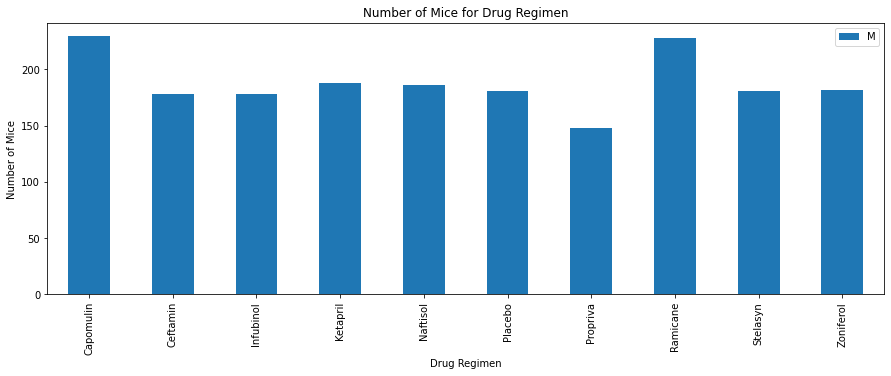

<Figure size 432x288 with 0 Axes>

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
mice_drug_regimen_groups = clean_mouse_data.groupby("Drug Regimen")
total_mice_drug_regimen= mice_drug_regimen_groups["Mouse ID"].count()

total_mice_drug_regimen.plot(kind="bar", figsize=(15,5), title="Number of Mice for Drug Regimen")

plt.ylabel("Number of Mice")
plt.legend("Mice Counts", loc="upper right")
plt.show()
plt.tight_layout()

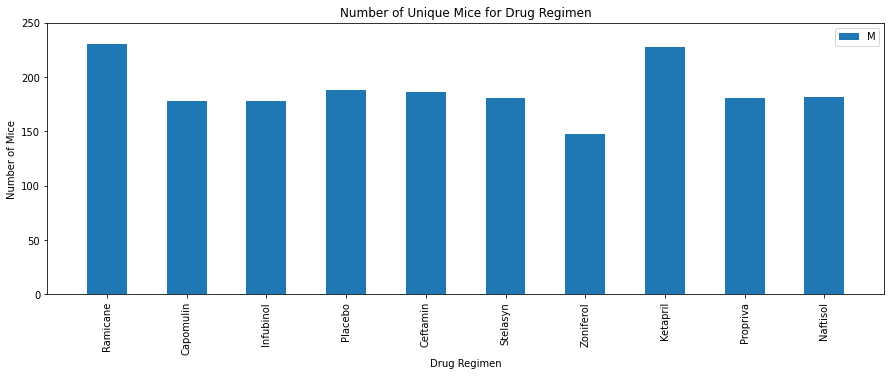

In [11]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_axis = [0,1,2,3,4,5,6,7,8,9]
y_axis = list(total_mice_drug_regimen)

plt.figure(figsize=(15,5))
plt.bar(x_axis, y_axis, align="center", width=0.5)

x_ticklabels = ['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol']
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_ticklabels, rotation="vertical")

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(y_axis)+20)

plt.title("Number of Unique Mice for Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.legend("Mice Counts", loc="upper right")

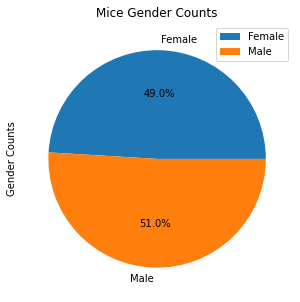

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_gender_groups = clean_mouse_data.groupby("Sex")

unique_mice_gender = mice_gender_groups["Mouse ID"].count()

labels = ["Female","Male"]

unique_mice_gender.plot.pie(y="Gender Counts", figsize=(5, 5), autopct="%1.1f%%", title="Mice Gender Counts")
plt.ylabel("Gender Counts")
plt.legend(labels, loc="upper right")

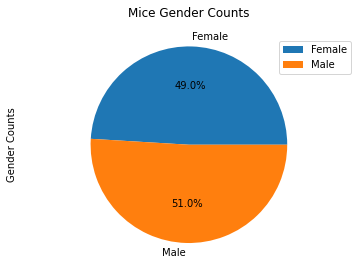

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female","Male"]

plt.pie(unique_mice_gender,labels=labels,autopct="%1.1f%%")
plt.axis("equal")
plt.title("Mice Gender Counts",fontsize=12, y=1.06)
plt.ylabel("Gender Counts")
plt.legend(labels, loc="upper right")

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_timepoint = clean_mouse_data.groupby(["Mouse ID"])["Timepoint"].max()
last_timepoint = last_timepoint.reset_index()

last_timepoint_tumor = last_timepoint.merge(clean_mouse_data, on=["Mouse ID","Timepoint"],how="left")
last_timepoint_tumor

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 
    
    # Determine outliers using upper and lower bounds
    #print(f"{drug}'s potential outliers:{outliers}")

In [16]:
regimen_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_regimen_list = []
    
for regimen in regimen_list:
    tumor_values = last_timepoint_tumor.loc[last_timepoint_tumor["Drug Regimen"] == regimen,"Tumor Volume (mm3)"]
    
    tumor_regimen_list.append(tumor_values)
    
    quartiles = tumor_values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outliers = tumor_values.loc[(tumor_values < lower_bound) | (tumor_values < lower_bound)]

    print(f"{regimen}'s potential outliers:{outliers}")

Capomulin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


In [17]:
tumor_regimen_list_combine = dict(zip(regimen_list,tumor_regimen_list))

Capomulin_box=tumor_regimen_list_combine["Capomulin"]
Ramicane_box=tumor_regimen_list_combine["Ramicane"]
Infubinol_box=tumor_regimen_list_combine["Infubinol"]
Ceftamin_box=tumor_regimen_list_combine["Ceftamin"]

data_to_plot = [Capomulin_box,Ramicane_box,Infubinol_box,Ceftamin_box]

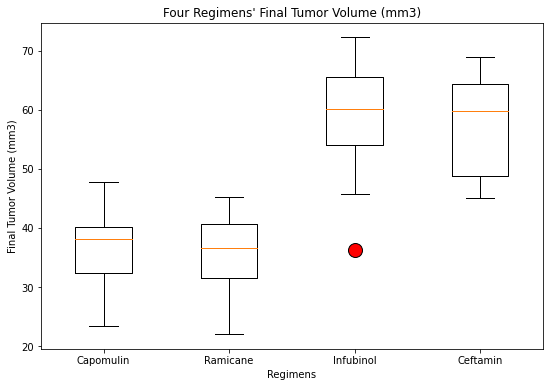

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig = plt.figure(1,figsize=(9,6))
ax = fig.add_subplot()
flierprops = dict(marker='o', markerfacecolor='r', markersize=14)
ax.boxplot(data_to_plot, flierprops=flierprops, labels=("Capomulin","Ramicane","Infubinol","Ceftamin"))
ax.set_title("Four Regimens' Final Tumor Volume (mm3)")
ax.set_ylabel("Final Tumor Volume (mm3)")
ax.set_xlabel("Regimens")
plt.show()

## Line and Scatter Plots

In [62]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
single_mouse = "b128"
single_mouse_timepoint = list(clean_mouse_data.loc[clean_mouse_data["Mouse ID"]==single_mouse, "Timepoint"])
single_mouse_tumor = list(clean_mouse_data.loc[clean_mouse_data["Mouse ID"]==single_mouse, "Tumor Volume (mm3)"])

Text(0, 0.5, 'Tumor Volume (mm3)')

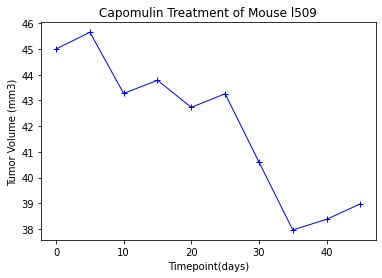

In [63]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.plot(single_mouse_timepoint, single_mouse_tumor, marker="+",color="blue", linewidth=1)
plt.title("Capomulin Treatment of Mouse l509")
plt.xlabel("Timepoint(days)")
plt.ylabel("Tumor Volume (mm3)")

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
